<a href="https://colab.research.google.com/github/Jiipengentobat/DIF62130_B_25_2311532004/blob/main/Praktikum1/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [15]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHousevalue'] = pd.Series(housing.target)

targets=df['MedHousevalue']
inputs=df.drop('MedHousevalue', axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHousevalue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
print('Dataframe dimension; ', df.shape)
df.info()

Dataframe dimension;  (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHousevalue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


In [28]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print (x_test)

[[8.14678418e-02 4.70588235e-01 2.34243862e-02 ... 2.56319369e-03
  3.73404255e-01 5.31872510e-01]
 [1.40094619e-01 5.68627451e-01 2.94319155e-02 ... 1.59940545e-03
  2.75531915e-01 4.87051793e-01]
 [2.05528200e-01 1.00000000e+00 2.18994569e-02 ... 5.37584539e-04
  5.58510638e-01 1.90239044e-01]
 ...
 [2.07728169e-01 2.94117647e-01 2.03757930e-02 ... 1.34975225e-03
  1.19148936e-01 6.41434263e-01]
 [2.17245279e-01 1.76470588e-01 3.27130659e-02 ... 2.29769634e-03
  5.60638298e-01 3.05776892e-01]
 [1.76004469e-01 3.13725490e-01 1.74931855e-02 ... 1.54725775e-03
  1.70212766e-01 6.08565737e-01]]


In [29]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [30]:
print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

intercept: 3.6307047193242292
slope: [  6.46451636   0.49377527 -17.21787732  19.70092818  -0.02767764
  -4.1877334   -3.93424542  -4.35422728]


In [32]:
y_pred=lr_model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
r2=lr_model.score(x_test, y_test)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.530567782476675
R2: 0.5957702326061665


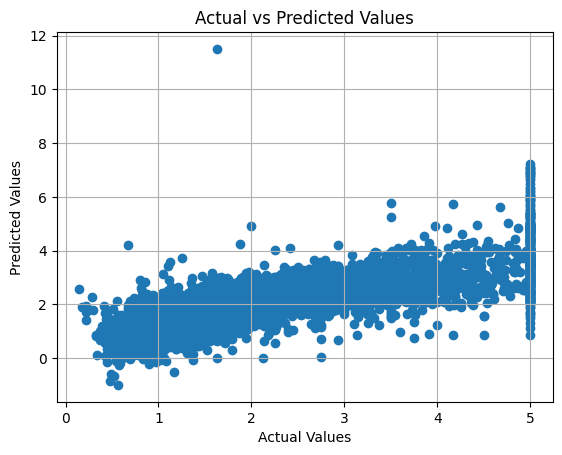

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()